In [21]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PREPROCESSING THE DATA¶

### Step 1. Load the data

In [22]:
edf = pd.read_csv('myexcel - myexcel.csv.csv')
edf

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [3]:
edf.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
edf.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0
457,Priyanka,Utah Jazz,34,C,25,07-Mar,231,Kansas,947276.0


In [5]:
edf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [6]:
edf.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [7]:
edf.describe(include="all")

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [8]:
# To check if there is any duplicate value
edf.duplicated().sum()

0

In [9]:
edf.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [63]:
edf.nunique()

Name             458
Team              30
Number            53
Position           5
Age               22
Weight            87
College          118
Salary           309
Height(in cm)     31
dtype: int64

In [66]:
edf.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [67]:
edf['Team'].unique()

array(['Boston Celtics', 'Brooklyn Nets', 'New York Knicks',
       'Philadelphia 76ers', 'Toronto Raptors', 'Golden State Warriors',
       'Los Angeles Clippers', 'Los Angeles Lakers', 'Phoenix Suns',
       'Sacramento Kings', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Detroit Pistons', 'Indiana Pacers', 'Milwaukee Bucks',
       'Dallas Mavericks', 'Houston Rockets', 'Memphis Grizzlies',
       'New Orleans Pelicans', 'San Antonio Spurs', 'Atlanta Hawks',
       'Charlotte Hornets', 'Miami Heat', 'Orlando Magic',
       'Washington Wizards', 'Denver Nuggets', 'Minnesota Timberwolves',
       'Oklahoma City Thunder', 'Portland Trail Blazers', 'Utah Jazz'],
      dtype=object)

In [68]:
edf['College'].unique()

array(['Texas', 'Marquette', 'Boston University', 'Georgia State', nan,
       'LSU', 'Gonzaga', 'Louisville', 'Oklahoma State', 'Ohio State',
       'Washington', 'Kentucky', 'North Carolina', 'Arizona',
       'Georgia Tech', 'Cincinnati', 'Miami (FL)', 'Stanford', 'Syracuse',
       'Saint Louis', 'Kansas', 'Georgetown', 'Texas A&M', 'UCLA', 'UNLV',
       'Wichita State', "Saint Joseph's", 'Notre Dame', 'Norfolk State',
       'Duke', 'Murray State', 'Tennessee State', 'Bowling Green',
       'Purdue', 'Wake Forest', 'Michigan', 'Missouri', 'USC',
       'Villanova', 'Rider', 'Utah', 'Belmont', 'Davidson', 'Vanderbilt',
       'Michigan State', 'Florida', 'Washington State', 'Arizona State',
       'Oklahoma', 'Wyoming', "St. John's", 'Maryland', 'Wisconsin',
       'Utah Valley', 'North Carolina State', 'UC Santa Barbara',
       'Baylor', 'Connecticut', 'Oregon State', 'New Mexico', 'Oregon',
       'Creighton', 'Arkansas', 'Memphis', "Saint Mary's", 'Tennessee',
       'Alabama'

In [69]:
edf.Name.unique()

array(['Avery Bradley', 'Jae Crowder', 'John Holland', 'R.J. Hunter',
       'Jonas Jerebko', 'Amir Johnson', 'Jordan Mickey', 'Kelly Olynyk',
       'Terry Rozier', 'Marcus Smart', 'Jared Sullinger', 'Isaiah Thomas',
       'Evan Turner', 'James Young', 'Tyler Zeller', 'Bojan Bogdanovic',
       'Markel Brown', 'Wayne Ellington', 'Rondae Hollis-Jefferson',
       'Jarrett Jack', 'Sergey Karasev', 'Sean Kilpatrick',
       'Shane Larkin', 'Brook Lopez', 'Chris McCullough', 'Willie Reed',
       'Thomas Robinson', 'Henry Sims', 'Donald Sloan', 'Thaddeus Young',
       'Arron Afflalo', 'Lou Amundson', 'Thanasis Antetokounmpo',
       'Carmelo Anthony', 'Jose Calderon', 'Cleanthony Early',
       'Langston Galloway', 'Jerian Grant', 'Robin Lopez', "Kyle O'Quinn",
       'Kristaps Porzingis', 'Kevin Seraphin', 'Lance Thomas',
       'Sasha Vujacic', 'Derrick Williams', 'Tony Wroten', 'Elton Brand',
       'Isaiah Canaan', 'Robert Covington', 'Joel Embiid', 'Jerami Grant',
       'Richaun H

### Step 2.Drop the columns that aren't useful

In [23]:
edf.drop(['Height'],axis=1,inplace=True)
edf

,Name,Team,Number,Position,Age,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,231,Kansas,947276.0


### Step3.  Creating a new 'Height' column with random values

In [24]:
edf['Height(in cm)'] = np.random.randint(150, 181, size=len(edf))
edf

,Name,Team,Number,Position,Age,Weight,College,Salary,Height(in cm)
0,Avery Bradley,Boston Celtics,0,PG,25,180,Texas,7730337.0,161
1,Jae Crowder,Boston Celtics,99,SF,25,235,Marquette,6796117.0,154
2,John Holland,Boston Celtics,30,SG,27,205,Boston University,NaN,174
3,R.J. Hunter,Boston Celtics,28,SG,22,185,Georgia State,1148640.0,165
4,Jonas Jerebko,Boston Celtics,8,PF,29,231,NaN,5000000.0,170
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,203,Butler,2433333.0,163
454,Raul Neto,Utah Jazz,25,PG,24,179,NaN,900000.0,156
455,Tibor Pleiss,Utah Jazz,21,C,26,256,NaN,2900000.0,154
456,Jeff Withey,Utah Jazz,24,C,26,231,Kansas,947276.0,173


### Step 4. Solving the questions

##### Q1. How many are there in each team and the percentage splitting with respect to the total employees

In [13]:
#Finding the number of Totalemployees
total_members = len(edf)
total_members

458

In [14]:
# Finding Number of members in each team
team_members = edf['Team'].value_counts()
team_members

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [15]:
# Finding the percentage splitting
percentage = (team_members/total_members)*100
percentage

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

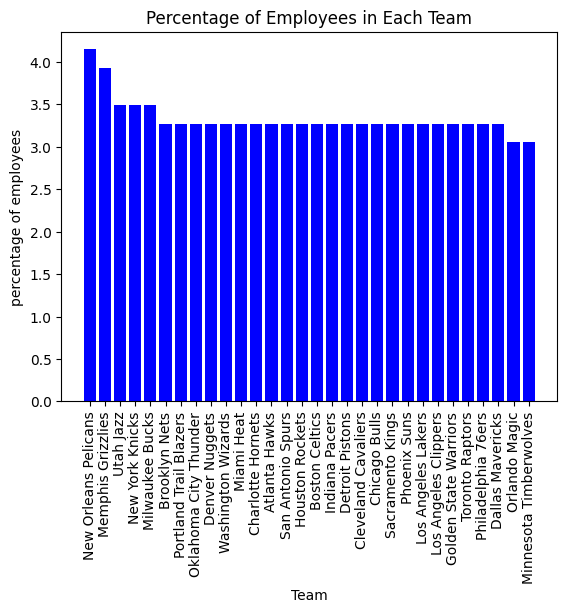

In [19]:
plt.bar(percentage.index,percentage.values,color='blue')
plt.xlabel('Team')
plt.ylabel('percentage of employees')
plt.title('Percentage of Employees in Each Team')
plt.xticks(rotation = 90)
plt.show()

##### Q2. Seggregate the employees with respect to the position

In [25]:
# Using groupby to sort the employees with respect to position
position = edf.groupby(['Position']).value_counts()
position

Position  Name             Team                   Number  Age  Weight  College           Salary      Height(in cm)
C         Al Horford       Atlanta Hawks          15      30   245     Florida           12000000.0  167              1
          Alan Williams    Phoenix Suns           15      23   260     UC Santa Barbara  83397.0     157              1
          Alex Len         Phoenix Suns           21      22   260     Maryland          3807120.0   175              1
          Andre Drummond   Detroit Pistons        0       22   279     Connecticut       3272091.0   159              1
          Andrew Bogut     Golden State Warriors  12      31   260     Utah              13800000.0  168              1
                                                                                                                     ..
SG        Tyreke Evans     New Orleans Pelicans   1       26   220     Memphis           10734586.0  157              1
          Victor Oladipo   Orlando Magic     

In [29]:
seggregation=edf.groupby('Position').size()
seggregation


Position
C      79
PF    100
PG     92
SF     85
SG    102
dtype: int64

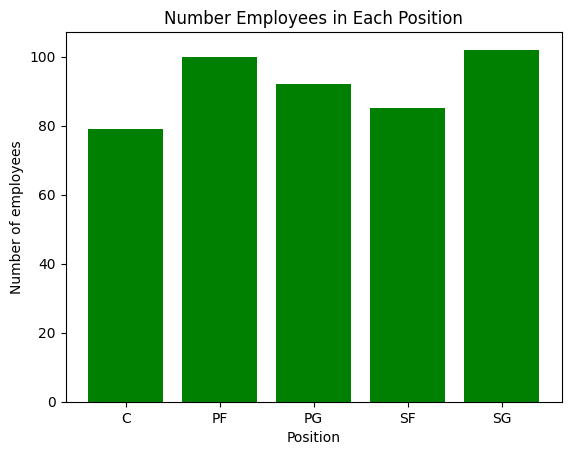

In [32]:
plt.bar(seggregation.index,seggregation.values,color='green')
plt.xlabel('Position')
plt.ylabel('Number of employees')
plt.title('Number Employees in Each Position')
plt.show()

##### Q3. Find from which age group most of the employees belongs to

In [7]:
# As asked to find the age group we need to group the ages
bins = [20, 30, 40, 50, 60]  
labels = ['20-29', '30-39', '40-49', '50+']
age_groups= pd.cut(edf['Age'], bins=bins, labels=labels)
count = age_groups.value_counts()
count

Age
20-29    346
30-39     91
40-49      0
50+        0
Name: count, dtype: int64

In [11]:
age_group = count.idxmax()
number=count.max()
print("Most of the employees belongs to the age group",age_group,"Number of employees belong to age group is",number)

Most of the employees belongs to the age group 20-29 Number of employees belong to age group is 346


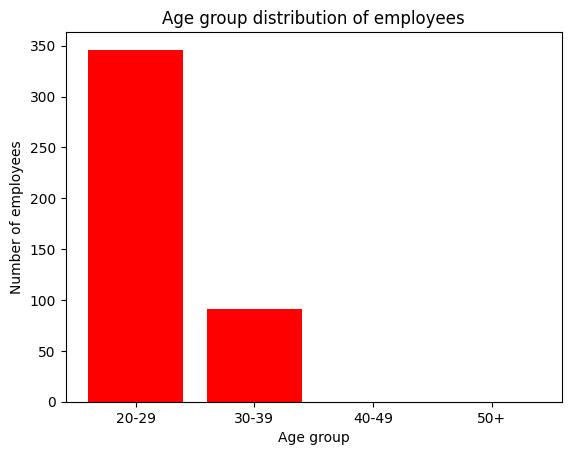

In [12]:
plt.bar(count.index,count.values,color='red')
plt.xlabel('Age group')
plt.ylabel('Number of employees')
plt.title('Age group distribution of employees')
plt.show()

##### Q4. Find out under which team and position , spending in terms of salary is high

In [40]:
# Highest salary and team
salary = edf.groupby('Team')['Salary'].sum()
team=salary.idxmax()
print("The team providing Highest Salary is",team)


The team providing Highest Salary is Cleveland Cavaliers


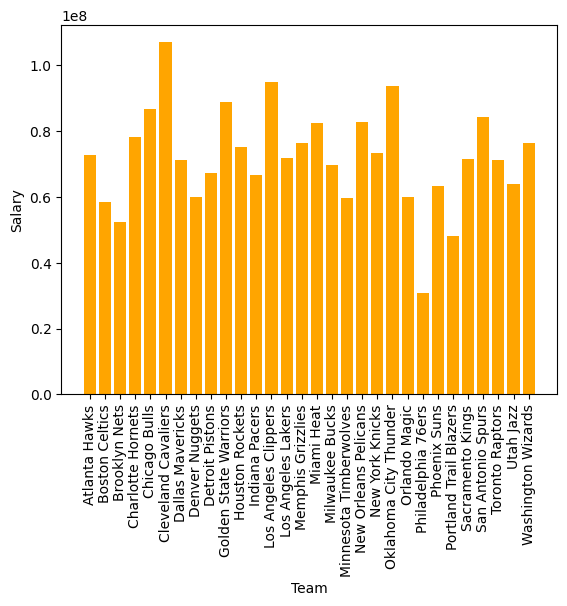

In [48]:
plt.bar(salary.index,salary.values,color='orange')
plt.xlabel('Team')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [51]:
# Highest salary and position
position = edf.groupby('Position')['Salary'].sum().idxmax()
print("The Position providing Highest Salary is",position)
max_salary=edf.groupby('Position')['Salary'].sum()
max_salary

The Position providing Highest Salary is C


Position
C     466377332.0
PF    442560850.0
PG    446848971.0
SF    408020976.0
SG    396976258.0
Name: Salary, dtype: float64

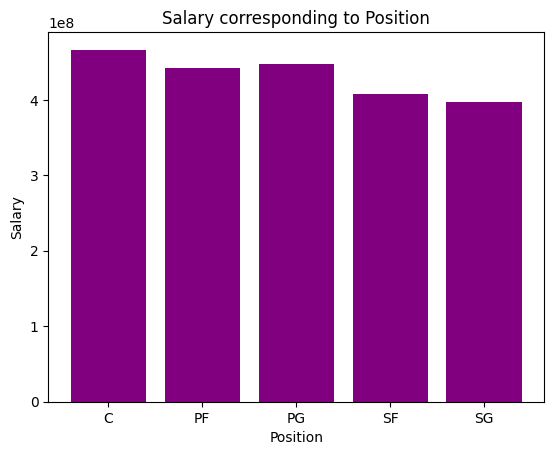

In [53]:
plt.bar(max_salary.index,max_salary.values,color='purple')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title("Salary corresponding to Position")
plt.show()

##### Q5. Find if there is any corelation between age and salary,represent it visually

In [57]:
correlation = edf['Age'].corr(edf['Salary'])
print("corelation between age and salary is",correlation)

corelation between age and salary is 0.2140094122657097


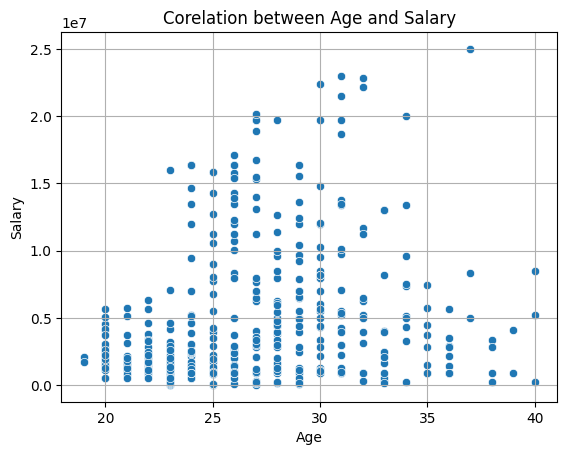

In [62]:
sns.scatterplot(x='Age',y='Salary',data=edf)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Corelation between Age and Salary')
plt.grid(True)
plt.show()